<a href="https://colab.research.google.com/github/KJM94/career/blob/main/py/%EC%BD%94%EC%9D%B8%EA%B3%BC_%EC%A5%AC%EC%96%BC%EC%9D%98_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time 
import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import rc
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 사이킷런의 군집분석 기법 활용을 위한 라이브러리 불러오기

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn import preprocessing

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,924 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/MyDrive/Colab Notebooks/ra')

In [ ]:
price = pd.read_csv('price.csv')

price.head()

,pri_id,fd_date,fd_country,fd_user_i_d,fd_device_i_d,fd_currency,fd_product_name,fd_price,created_at,updated_at,deleted_at,fd_member_i_d,fd_datetime
0,1,2021-08-12,South Korea,0050DEA4B70147C3A00AC947633E991F,B0F4CB83-1FEE-42CA-A356-A140CE0D1539,KRW,1주년 패키지,2500.0,2021-09-06 03:06:02,2021-09-06 03:06:02,NaN,NaN,2021-08-12 00:00:00
1,2,2021-09-02,South Korea,006F541CDF924F418E46DEFF96FB9437,A5FA7CDF-818B-4D17-BB77-849A778E8C9C,KRW,쥬얼 패키지,9900.0,2021-09-06 03:06:02,2021-09-06 03:06:02,NaN,NaN,2021-09-02 00:00:00
2,3,2021-08-29,South Korea,00D34A10F49542D8933B0A8771D5B40A,409EEF8A-B304-42D4-B9AE-E471036B8D67,KRW,고스트 확정권,9900.0,2021-09-06 03:06:02,2021-09-06 03:06:02,NaN,NaN,2021-08-29 00:00:00
3,4,2021-08-28,South Korea,00D34A10F49542D8933B0A8771D5B40A,409EEF8A-B304-42D4-B9AE-E471036B8D67,KRW,고스트 확정권,9900.0,2021-09-06 03:06:02,2021-09-06 03:06:02,NaN,NaN,2021-08-28 00:00:00
4,5,2021-08-22,South Korea,00D34A10F49542D8933B0A8771D5B40A,409EEF8A-B304-42D4-B9AE-E471036B8D67,KRW,쥬얼 패키지,9900.0,2021-09-06 03:06:02,2021-09-06 03:06:02,NaN,NaN,2021-08-22 00:00:00


In [ ]:
price = price.rename(columns={'fd_member_i_d':'fd_member_id'})

price.head()

,pri_id,fd_date,fd_country,fd_user_i_d,fd_device_i_d,fd_currency,fd_product_name,fd_price,created_at,updated_at,deleted_at,fd_member_id,fd_datetime
0,1,2021-08-12,South Korea,0050DEA4B70147C3A00AC947633E991F,B0F4CB83-1FEE-42CA-A356-A140CE0D1539,KRW,1주년 패키지,2500.0,2021-09-06 03:06:02,2021-09-06 03:06:02,NaN,NaN,2021-08-12 00:00:00
1,2,2021-09-02,South Korea,006F541CDF924F418E46DEFF96FB9437,A5FA7CDF-818B-4D17-BB77-849A778E8C9C,KRW,쥬얼 패키지,9900.0,2021-09-06 03:06:02,2021-09-06 03:06:02,NaN,NaN,2021-09-02 00:00:00
2,3,2021-08-29,South Korea,00D34A10F49542D8933B0A8771D5B40A,409EEF8A-B304-42D4-B9AE-E471036B8D67,KRW,고스트 확정권,9900.0,2021-09-06 03:06:02,2021-09-06 03:06:02,NaN,NaN,2021-08-29 00:00:00
3,4,2021-08-28,South Korea,00D34A10F49542D8933B0A8771D5B40A,409EEF8A-B304-42D4-B9AE-E471036B8D67,KRW,고스트 확정권,9900.0,2021-09-06 03:06:02,2021-09-06 03:06:02,NaN,NaN,2021-08-28 00:00:00
4,5,2021-08-22,South Korea,00D34A10F49542D8933B0A8771D5B40A,409EEF8A-B304-42D4-B9AE-E471036B8D67,KRW,쥬얼 패키지,9900.0,2021-09-06 03:06:02,2021-09-06 03:06:02,NaN,NaN,2021-08-22 00:00:00


In [ ]:
price = price.drop(["fd_country", "fd_date","created_at", "updated_at", "deleted_at", "fd_datetime"], axis = 1, inplace = False)

price.head()

,pri_id,fd_user_i_d,fd_device_i_d,fd_currency,fd_product_name,fd_price,fd_member_id
0,1,0050DEA4B70147C3A00AC947633E991F,B0F4CB83-1FEE-42CA-A356-A140CE0D1539,KRW,1주년 패키지,2500.0,NaN
1,2,006F541CDF924F418E46DEFF96FB9437,A5FA7CDF-818B-4D17-BB77-849A778E8C9C,KRW,쥬얼 패키지,9900.0,NaN
2,3,00D34A10F49542D8933B0A8771D5B40A,409EEF8A-B304-42D4-B9AE-E471036B8D67,KRW,고스트 확정권,9900.0,NaN
3,4,00D34A10F49542D8933B0A8771D5B40A,409EEF8A-B304-42D4-B9AE-E471036B8D67,KRW,고스트 확정권,9900.0,NaN
4,5,00D34A10F49542D8933B0A8771D5B40A,409EEF8A-B304-42D4-B9AE-E471036B8D67,KRW,쥬얼 패키지,9900.0,NaN


In [ ]:
userdata = pd.read_csv('userdata.csv')

userdata.head()

,pri_id,fd_member_id,fd_date_time,fd_device,fd_emoticon_cnt,fd_friends_cnt,fd_is_clan,fd_coin,fd_jewel,fd_jewel_pass,fd_language,fd_level,fd_skill_lv_avg,fd_special_pass,fd_supporter_cnt,fd_survey_id,fd_tp_max_cnt,fd_trophy,fd_u_card_cnt,fd_u_card_lv_avg,created_at,updated_at,deleted_at
0,1,b8378b21-e444-4a78-81a6-895b35ddb704,2022-01-31T00:47:40.530Z,samsung SM-G977N,0,0,0,0,0,0,LANGUAGE_CATEGORY_KOR,1,0,0,2,0,0,0,0,NaN,2022-02-09 02:29:12,2022-02-09 02:29:12,NaN
1,2,2addb4c8-5a12-4a40-8566-c81423503da8,2022-02-08T05:23:48.163Z,"iPad7,5",1,11,0,3564,992,0,LANGUAGE_CATEGORY_KOR,10,0,0,2,0,0,583,6,4.0,2022-02-09 02:29:12,2022-02-09 02:29:12,NaN
2,3,4321b5d1-95b2-48b8-b39f-19186959bed6,2022-01-29T01:23:27.399Z,samsung SM-G981N,0,0,0,0,200,0,LANGUAGE_CATEGORY_KOR,1,0,0,2,0,0,0,0,NaN,2022-02-09 02:29:12,2022-02-09 02:29:12,NaN
3,4,4f12d243-24e9-4198-9619-cf5341bd77e4,2022-01-26T05:02:53.212Z,samsung SM-G965N,0,0,0,2471,6,0,LANGUAGE_CATEGORY_KOR,4,0,0,2,0,0,167,2,1.0,2022-02-09 02:29:12,2022-02-09 02:29:12,NaN
4,5,4489afee-9eec-4f2e-be6c-a5b99d3d7311,2022-02-03T13:19:06.576Z,samsung SM-T820,0,0,0,2559,18,0,LANGUAGE_CATEGORY_KOR,8,0,0,4,0,0,312,5,1.0,2022-02-09 02:29:12,2022-02-09 02:29:12,NaN


In [ ]:
userdata = userdata.drop(["pri_id" ,"fd_device","fd_member_id", "fd_date_time","fd_language", "created_at", "deleted_at", "updated_at"], axis = 1, inplace = False)

userdata.head()

,fd_emoticon_cnt,fd_friends_cnt,fd_is_clan,fd_coin,fd_jewel,fd_jewel_pass,fd_level,fd_skill_lv_avg,fd_special_pass,fd_supporter_cnt,fd_survey_id,fd_tp_max_cnt,fd_trophy,fd_u_card_cnt,fd_u_card_lv_avg
0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,NaN
1,1,11,0,3564,992,0,10,0,0,2,0,0,583,6,4.0
2,0,0,0,0,200,0,1,0,0,2,0,0,0,0,NaN
3,0,0,0,2471,6,0,4,0,0,2,0,0,167,2,1.0
4,0,0,0,2559,18,0,8,0,0,4,0,0,312,5,1.0


In [ ]:
userdata = userdata.fillna(0)

In [ ]:
userdata.count()

fd_emoticon_cnt     381092
fd_friends_cnt      381092
fd_is_clan          381092
fd_coin             381092
fd_jewel            381092
fd_jewel_pass       381092
fd_level            381092
fd_skill_lv_avg     381092
fd_special_pass     381092
fd_supporter_cnt    381092
fd_survey_id        381092
fd_tp_max_cnt       381092
fd_trophy           381092
fd_u_card_cnt       381092
fd_u_card_lv_avg    381092
dtype: int64

In [ ]:
userdata.head()

,fd_emoticon_cnt,fd_friends_cnt,fd_is_clan,fd_coin,fd_jewel,fd_jewel_pass,fd_level,fd_skill_lv_avg,fd_special_pass,fd_supporter_cnt,fd_survey_id,fd_tp_max_cnt,fd_trophy,fd_u_card_cnt,fd_u_card_lv_avg
0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0.0
1,1,11,0,3564,992,0,10,0,0,2,0,0,583,6,4.0
2,0,0,0,0,200,0,1,0,0,2,0,0,0,0,0.0
3,0,0,0,2471,6,0,4,0,0,2,0,0,167,2,1.0
4,0,0,0,2559,18,0,8,0,0,4,0,0,312,5,1.0


In [ ]:
userdata = userdata.drop(["fd_emoticon_cnt", "fd_friends_cnt","fd_is_clan", "fd_jewel_pass", "fd_skill_lv_avg", "fd_level", "fd_special_pass", "fd_coin", "fd_survey_id", "fd_tp_max_cnt", "fd_trophy", "fd_u_card_cnt", "fd_u_card_lv_avg"], axis = 1, inplace = False)

userdata.head()

,fd_jewel,fd_supporter_cnt
0,0,2
1,992,2
2,200,2
3,6,2
4,18,4


In [ ]:
mdata = pd.merge(price, userdata, on='fd_member_id')

mdata

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


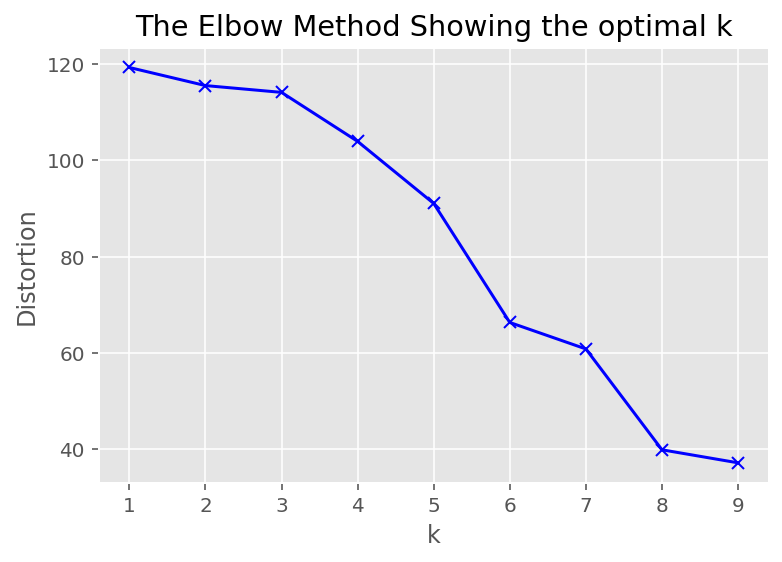

In [ ]:
from scipy.spatial.distance import cdist

X = userdata.values
Distortions = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    Distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_), axis=1)) / X.shape[0])

plt.plot(K, Distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 6)
kmeans.fit(userdata)
userdata['cluster'] = kmeans.labels_

score_samples = silhouette_samples(userdata, userdata['cluster'])
print(score_samples.shape)
print(score_samples)
userdata['silhoutte_coeff'] = score_samples

average_score = silhouette_score(userdata, userdata['cluster'])
print(average_score)
print(userdata.groupby('cluster')['silhoutte_coeff'].mean())

(381092,)
[0.81391549 0.31701693 0.40093917 ... 0.68404904 0.49926126 0.81391549]
0.6522071081952387
cluster
0    0.719120
1    0.000000
2    0.000000
3    0.432102
4    0.446327
5    0.430327
Name: silhoutte_coeff, dtype: float64


In [ ]:
userdata.head()

,fd_coin,fd_jewel,cluster,silhoutte_coeff
0,0,0,0,0.916353
1,3564,992,0,0.762010
2,0,200,0,0.915369
3,2471,6,0,0.852123
4,2559,18,0,0.847007


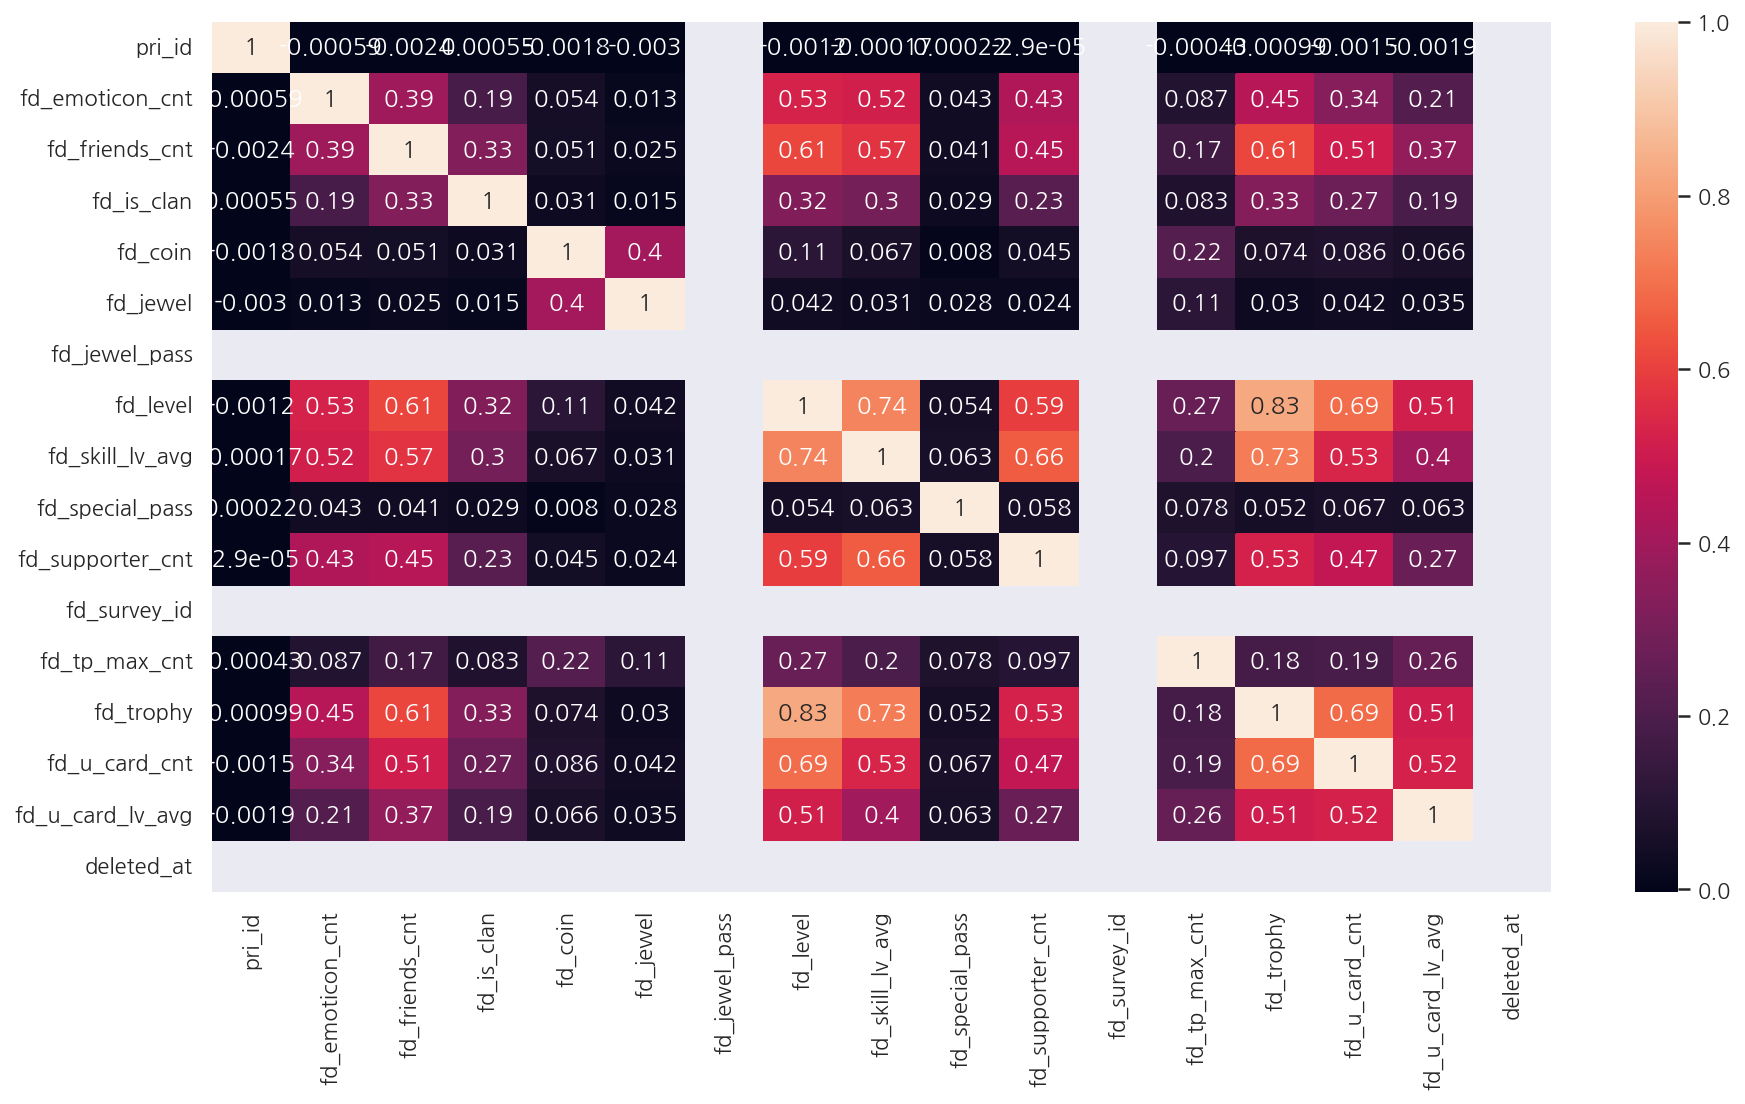

In [ ]:
sns.set(font = "NanumGothic", rc = {'figure.figsize':(15,8), "axes.unicode_minus" : False})
sns.heatmap(userdata.corr(), annot = True)


코인보유량과 쥬얼보유량은 약한 양의 상관관계를 보이고 있으며, 쥬얼을 소모할 경우 코인획득에 득이 될 수 있는 아이템 및 컨텐츠가 추가된다면 쥬얼소모 촉진에 도움이 될 것으로 예상함